In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv('/Users/apple/Downloads/Top Grossing Video Games/Top_Selling_Games.csv')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataset loaded successfully!

Dataset shape: (50, 7)
Number of rows: 50
Number of columns: 7


In [3]:
df.head(10)

,Game Title,Units Sold (millions),Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b]
0,Minecraft,350000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios / Xbox Game Studios
1,Grand Theft Auto V,215000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
3,Ark: Survival Evolved,79045000,Ark,Multi-platform,"August 29, 2017",Studio Wildcard,Studio Wildcard
4,Mario Kart 8 / Deluxe,76660000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD / Nintendo EPD (Deluxe),Nintendo
5,Pokémon Red / Blue / Yellow,76140000,Pokémon,Multi-platform,"February 27, 1996",Game Freak,Nintendo
6,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Studios,Krafton
7,Red Dead Redemption 2,74000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Games,Rockstar Games
8,The Sims,70000000,The Sims,Multi-platform,"February 4, 2000",Maxis,Electronic Arts
9,The Oregon Trail,65000000,The Oregon Trail,Multi-platform,"December 3, 1971",Don Rawitsch Bill Heinemann Paul Dillenberger,MECC


In [ ]:
# Step 4: Basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nColumn names:")
print(df.columns.tolist())
print("\n" + "=" * 50)
print("\nData types:")
print(df.dtypes)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Game Title             50 non-null     object
 1   Units Sold (millions)  50 non-null     int64 
 2   Series                 50 non-null     object
 3   Platform(s)            50 non-null     object
 4   Initial release date   50 non-null     object
 5   Developer(s)[b]        50 non-null     object
 6   Publisher(s)[b]        50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


Column names:
['Game Title', 'Units Sold (millions)', 'Series', 'Platform(s)', 'Initial release date', 'Developer(s)[b]', 'Publisher(s)[b]']


Data types:
Game Title               object
Units Sold (millions)     int64
Series                   object
Platform(s)              object
Initial release date     object
Developer(s)[b]          object
Publisher(s)[b]          o

In [5]:
# Step 5: Check for missing values
print("Missing values in each column:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])
if missing_df[missing_df['Missing Count'] > 0].empty:
    print("No missing values found!")


Missing values in each column:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!


In [ ]:
# Step 6: Basic statistics
print("Statistical Summary:")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)
print("\nSummary Statistics for Units Sold:")
print(f"Total units sold (millions): {df['Units Sold (millions)'].sum():,.0f}")
print(f"Average units sold (millions): {df['Units Sold (millions)'].mean():,.2f}")
print(f"Median units sold (millions): {df['Units Sold (millions)'].median():,.2f}")
print(f"Maximum units sold (millions): {df['Units Sold (millions)'].max():,.0f}")
print(f"Minimum units sold (millions): {df['Units Sold (millions)'].min():,.0f}")


Statistical Summary:
       Units Sold (millions)
count           5.000000e+01
mean            5.301990e+07
std             5.185053e+07
min             2.802000e+07
25%             3.017000e+07
50%             3.869000e+07
75%             5.375000e+07
max             3.500000e+08


Summary Statistics for Units Sold:
Total units sold (millions): 2,650,995,000
Average units sold (millions): 53,019,900.00
Median units sold (millions): 38,690,000.00
Maximum units sold (millions): 350,000,000
Minimum units sold (millions): 28,020,000


In [7]:
# Step 7: Top 10 Best Selling Games
print("Top 10 Best Selling Games:")
print("=" * 70)
top_10 = df.nlargest(10, 'Units Sold (millions)')[['Game Title', 'Units Sold (millions)', 'Platform(s)', 'Series']]
for idx, row in top_10.iterrows():
    print(f"{row['Game Title']:40s} | {row['Units Sold (millions)']:>15,.0f}M | {row['Platform(s)']:20s} | {row['Series']}")


Top 10 Best Selling Games:
Minecraft                                |     350,000,000M | Multi-platform       | Minecraft
Grand Theft Auto V                       |     215,000,000M | Multi-platform       | Grand Theft Auto
Wii Sports                               |      82,900,000M | Wii                  | Wii
Ark: Survival Evolved                    |      79,045,000M | Multi-platform       | Ark
Mario Kart 8 / Deluxe                    |      76,660,000M | Wii U / Switch       | Mario Kart
Pokémon Red / Blue / Yellow              |      76,140,000M | Multi-platform       | Pokémon
PUBG: Battlegrounds                      |      75,000,000M | Multi-platform       | PUBG Universe
Red Dead Redemption 2                    |      74,000,000M | Multi-platform       | Red Dead
The Sims                                 |      70,000,000M | Multi-platform       | The Sims
The Oregon Trail                         |      65,000,000M | Multi-platform       | The Oregon Trail


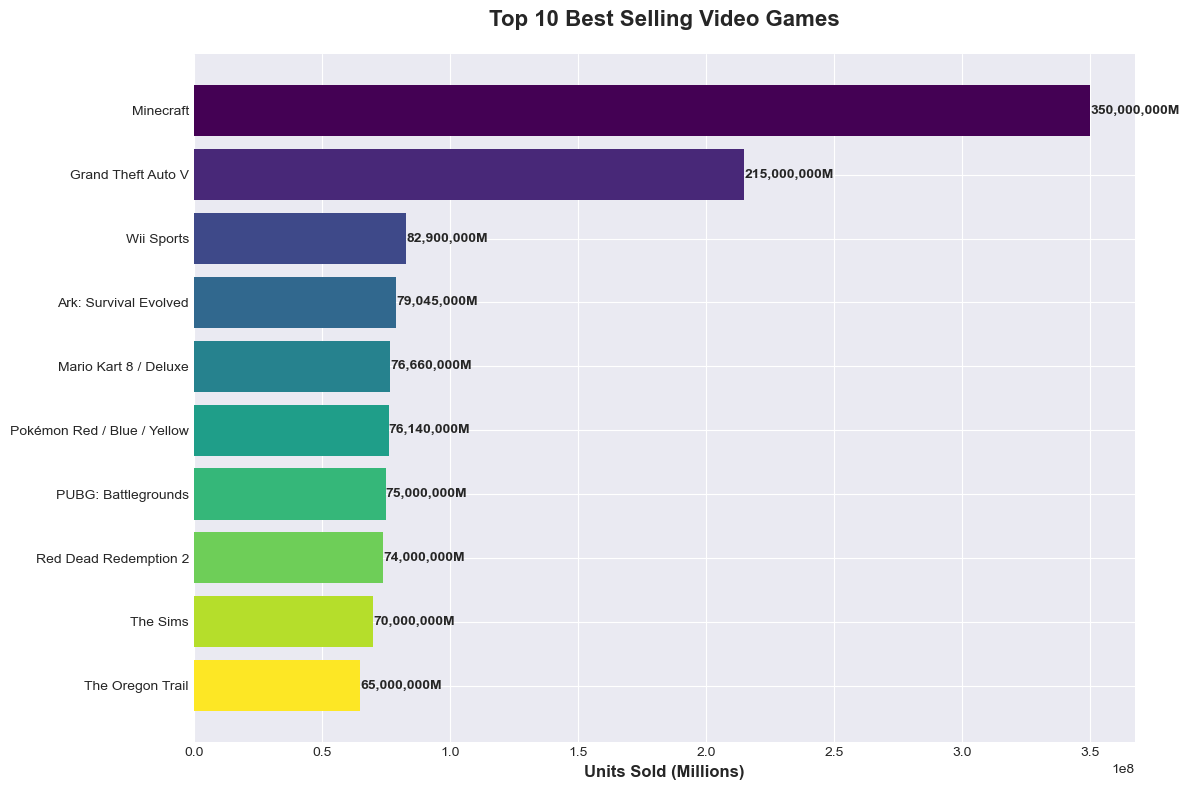

In [8]:
# Step 8: Visualize Top 10 Best Selling Games
plt.figure(figsize=(12, 8))
top_10_games = df.nlargest(10, 'Units Sold (millions)')
colors = plt.cm.viridis(np.linspace(0, 1, 10))

bars = plt.barh(range(len(top_10_games)), top_10_games['Units Sold (millions)'], color=colors)
plt.yticks(range(len(top_10_games)), top_10_games['Game Title'])
plt.xlabel('Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.title('Top 10 Best Selling Video Games', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (idx, row) in enumerate(top_10_games.iterrows()):
    plt.text(row['Units Sold (millions)'] + 5, i, f"{row['Units Sold (millions)']:,.0f}M", 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [9]:
# Step 9: Analyze by Game Series
print("Top Game Series by Total Units Sold:")
print("=" * 70)
series_sales = df.groupby('Series')['Units Sold (millions)'].sum().sort_values(ascending=False)
print(series_sales.head(15))

# Visualize top series
plt.figure(figsize=(12, 8))
top_series = series_sales.head(10)
colors = plt.cm.plasma(np.linspace(0, 1, 10))

bars = plt.barh(range(len(top_series)), top_series.values, color=colors)
plt.yticks(range(len(top_series)), top_series.index)
plt.xlabel('Total Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.title('Top 10 Game Series by Total Units Sold', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (series, sales) in enumerate(top_series.items()):
    plt.text(sales + 5, i, f"{sales:,.0f}M", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Top Game Series by Total Units Sold:
Series
Minecraft           350000000
Call of Duty        265410000
Grand Theft Auto    215000000
Wii                 187860000
Super Mario         148400000
Mario Kart          114040000
Pokémon             106260000
The Sims            106000000
Ark                  79045000
PUBG Universe        75000000
Red Dead             74000000
The Oregon Trail     65000000
Terraria             64000000
Human: Fall Flat     55000000
Overwatch            50000000
Name: Units Sold (millions), dtype: int64


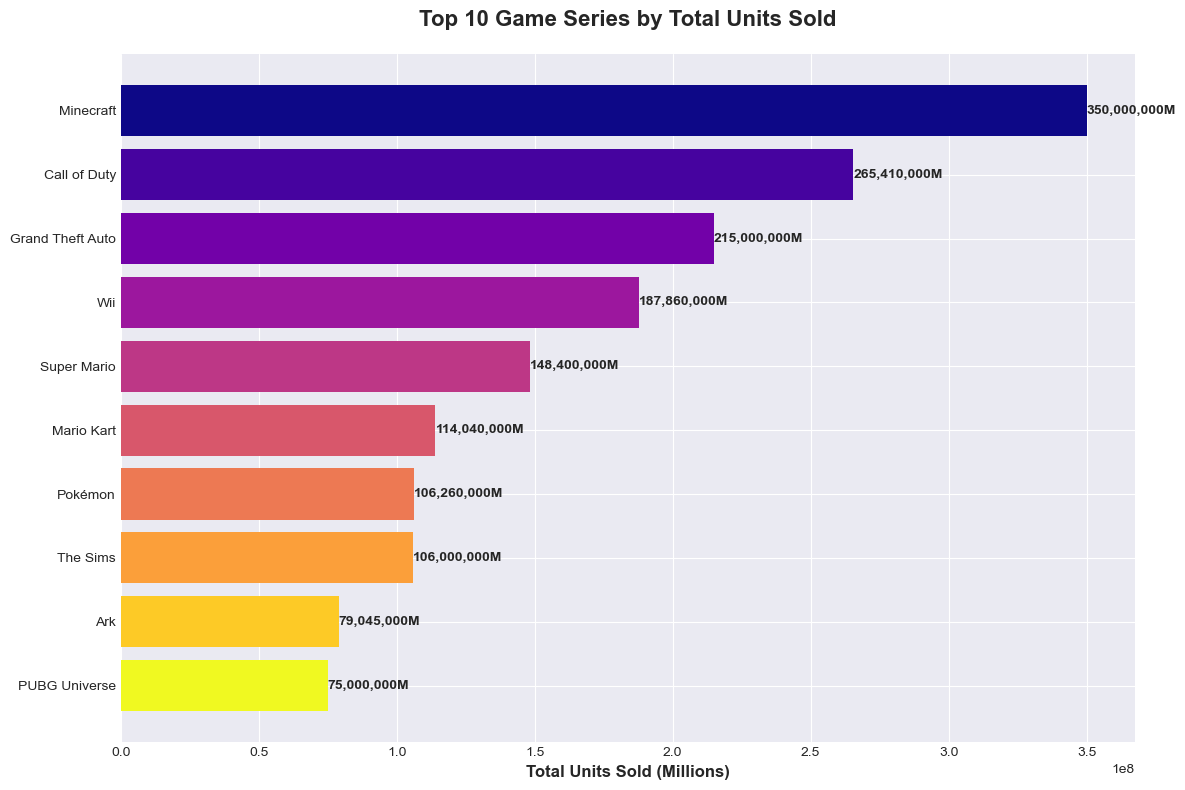

In [ ]:
plt.figure(figsize=(12, 8))
top_series = series_sales.head(10)
colors = plt.cm.plasma(np.linspace(0, 1, 10))

bars = plt.barh(range(len(top_series)), top_series.values, color=colors)
plt.yticks(range(len(top_series)), top_series.index)
plt.xlabel('Total Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.title('Top 10 Game Series by Total Units Sold', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()


for i, (series, sales) in enumerate(top_series.items()):
    plt.text(sales + 5, i, f"{sales:,.0f}M", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# Step 10: Analyze by Platform
print("Games by Platform:")
print("=" * 70)

# Count games by platform
platform_counts = df['Platform(s)'].value_counts()
print("\nNumber of games per platform:")
print(platform_counts)

# Total sales by platform
platform_sales = df.groupby('Platform(s)')['Units Sold (millions)'].sum().sort_values(ascending=False)
print("\n\nTotal Units Sold by Platform:")
print(platform_sales)


Games by Platform:

Number of games per platform:
Platform(s)
Multi-platform     34
Wii                 6
Nintendo Switch     3
Wii U / Switch      2
PC                  1
Game Boy            1
Nintendo DS         1
Game Boy Color      1
Famicom / NES       1
Name: count, dtype: int64


Total Units Sold by Platform:
Platform(s)
Multi-platform     2006105000
Wii                 255560000
Nintendo Switch     113340000
Wii U / Switch      111170000
PC                   40600000
Game Boy             35000000
Nintendo DS          30800000
Game Boy Color       30120000
Famicom / NES        28300000
Name: Units Sold (millions), dtype: int64


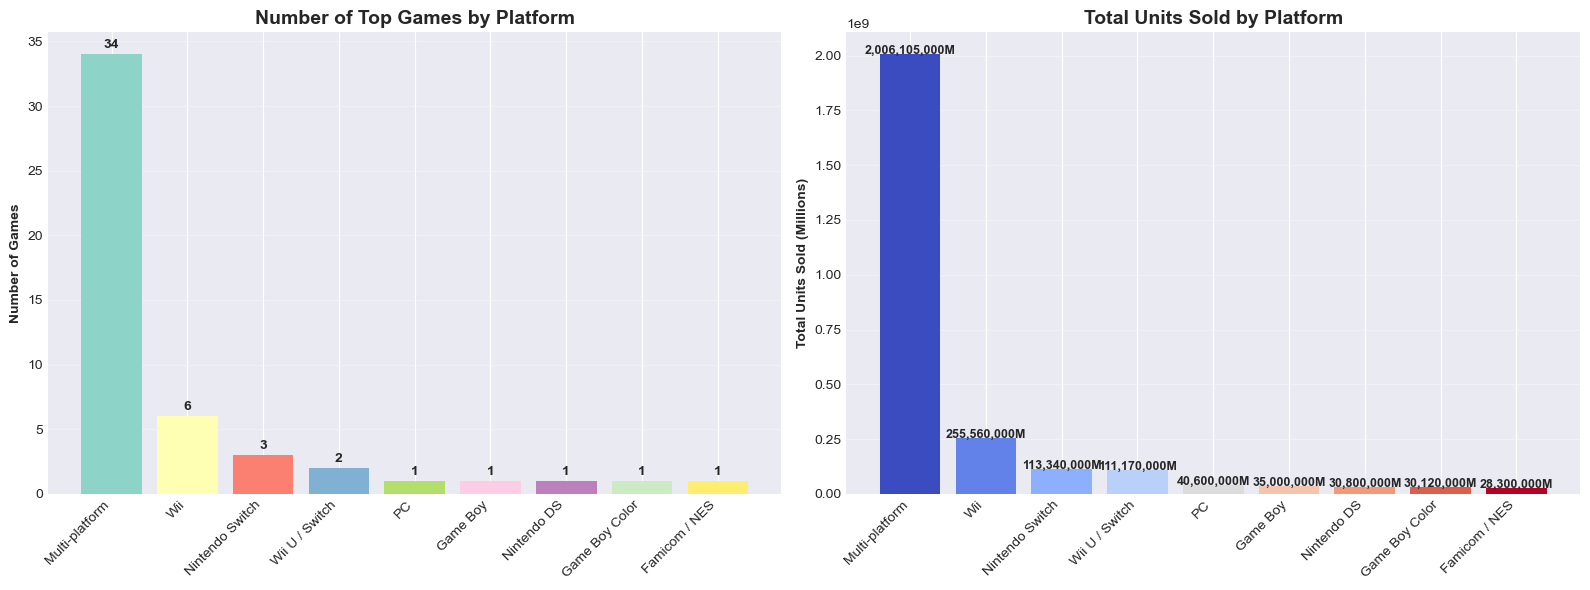

In [14]:
# Step 11: Visualize Platform Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of games per platform
platform_counts = df['Platform(s)'].value_counts().head(10)
colors1 = plt.cm.Set3(np.linspace(0, 1, len(platform_counts)))
ax1.bar(range(len(platform_counts)), platform_counts.values, color=colors1)
ax1.set_xticks(range(len(platform_counts)))
ax1.set_xticklabels(platform_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Games', fontweight='bold')
ax1.set_title('Number of Top Games by Platform', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(platform_counts.values):
    ax1.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Plot 2: Total sales by platform
platform_sales = df.groupby('Platform(s)')['Units Sold (millions)'].sum().sort_values(ascending=False).head(10)
colors2 = plt.cm.coolwarm(np.linspace(0, 1, len(platform_sales)))
ax2.bar(range(len(platform_sales)), platform_sales.values, color=colors2)
ax2.set_xticks(range(len(platform_sales)))
ax2.set_xticklabels(platform_sales.index, rotation=45, ha='right')
ax2.set_ylabel('Total Units Sold (Millions)', fontweight='bold')
ax2.set_title('Total Units Sold by Platform', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(platform_sales.values):
    ax2.text(i, v + 10, f"{v:,.0f}M", ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


In [17]:
# Step 12: Analyze by Publisher
print("Top Publishers by Total Units Sold:")
print("=" * 70)
publisher_sales = df.groupby('Publisher(s)[b]')['Units Sold (millions)'].sum().sort_values(ascending=False)
print(publisher_sales.head(10))

# Visualize top publishers
plt.figure(figsize=(12, 8))
top_publishers = publisher_sales.head(10)
colors = plt.cm.tab20(np.linspace(0, 1, 10))

bars = plt.barh(range(len(top_publishers)), top_publishers.values, color=colors)
plt.yticks(range(len(top_publishers)), top_publishers.index)
plt.xlabel('Total Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.title('Top 10 Publishers by Total Units Sold', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (publisher, sales) in enumerate(top_publishers.items()):
    plt.text(sales + 10, i, f"{sales:,.0f}M", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Top Publishers by Total Units Sold:
Publisher(s)[b]
Nintendo                              738430000
Mojang Studios / Xbox Game Studios    350000000
Rockstar Games                        289000000
Activision                            265410000
Blizzard Entertainment                120600000
Electronic Arts                       106000000
CD Projekt                             80000000
Studio Wildcard                        79045000
Krafton                                75000000
MECC                                   65000000
Name: Units Sold (millions), dtype: int64


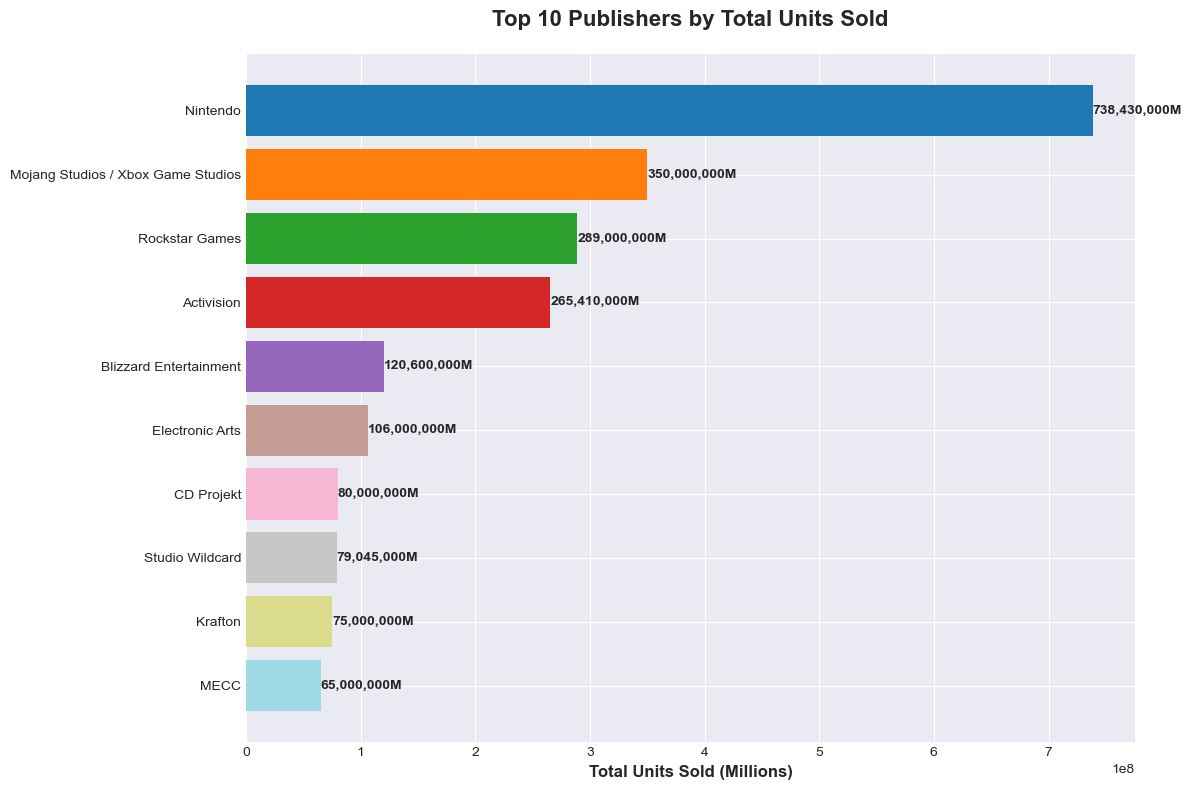

In [18]:
plt.figure(figsize=(12, 8))
top_publishers = publisher_sales.head(10)
colors = plt.cm.tab20(np.linspace(0, 1, 10))

bars = plt.barh(range(len(top_publishers)), top_publishers.values, color=colors)
plt.yticks(range(len(top_publishers)), top_publishers.index)
plt.xlabel('Total Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.title('Top 10 Publishers by Total Units Sold', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()


for i, (publisher, sales) in enumerate(top_publishers.items()):
    plt.text(sales + 10, i, f"{sales:,.0f}M", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
# Step 13: Analyze by Release Year (extract year from date)
# Convert release date to datetime and extract year
df['Release Year'] = pd.to_datetime(df['Initial release date'], errors='coerce').dt.year

print("Games by Release Year:")
print("=" * 70)
year_counts = df['Release Year'].value_counts().sort_index()
print(year_counts)

# Sales by year
year_sales = df.groupby('Release Year')['Units Sold (millions)'].sum().sort_index()
print("\n\nTotal Units Sold by Release Year:")
print(year_sales)


Games by Release Year:
Release Year
1971.0    1
1984.0    1
1985.0    1
1989.0    1
1991.0    1
1996.0    1
1999.0    1
2000.0    2
2004.0    1
2006.0    3
2007.0    1
2008.0    1
2009.0    2
2010.0    1
2011.0    3
2012.0    3
2013.0    3
2014.0    2
2015.0    2
2016.0    3
2017.0    4
2018.0    3
2019.0    1
2020.0    3
2021.0    1
2022.0    1
2023.0    1
2024.0    1
Name: count, dtype: int64


Total Units Sold by Release Year:
Release Year
1971.0     65000000
1984.0     28300000
1985.0     58000000
1989.0     35000000
1991.0     40000000
1996.0     76140000
1999.0     30120000
2000.0    120000000
2004.0     40600000
2006.0    141720000
2007.0     43800000
2008.0     37380000
2009.0     63460000
2010.0     30720000
2011.0    134710000
2012.0     91000000
2013.0    283980000
2014.0    112660000
2015.0     93000000
2016.0    146000000
2017.0    217835000
2018.0    138750000
2019.0     41000000
2020.0    107820000
2021.0     30000000
2022.0     30000000
2023.0     34000000
2024.0     30

/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_7043/525934629.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Year'] = pd.to_datetime(df['Initial release date'], errors='coerce').dt.year


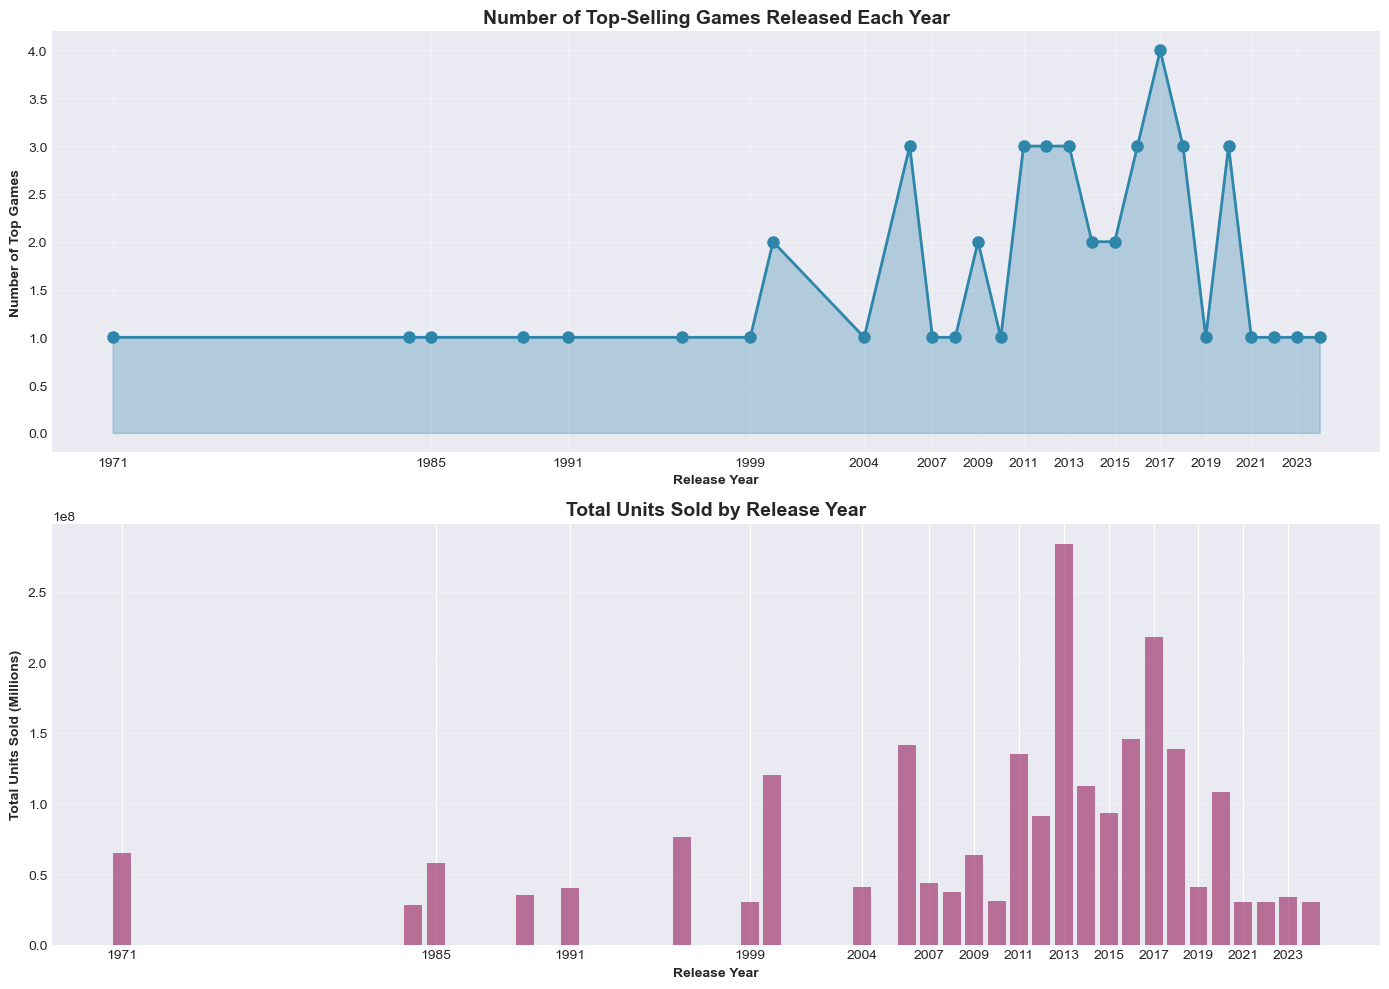

In [21]:
# Step 14: Visualize Sales Trends Over Time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Number of top games released per year
year_counts = df['Release Year'].value_counts().sort_index()
ax1.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='#2E86AB')
ax1.set_xlabel('Release Year', fontweight='bold')
ax1.set_ylabel('Number of Top Games', fontweight='bold')
ax1.set_title('Number of Top-Selling Games Released Each Year', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(year_counts.index[::2])  # Show every other year

# Plot 2: Total sales by release year
year_sales = df.groupby('Release Year')['Units Sold (millions)'].sum().sort_index()
ax2.bar(year_sales.index, year_sales.values, color='#A23B72', alpha=0.7)
ax2.set_xlabel('Release Year', fontweight='bold')
ax2.set_ylabel('Total Units Sold (Millions)', fontweight='bold')
ax2.set_title('Total Units Sold by Release Year', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(year_sales.index[::2])  # Show every other year

plt.tight_layout()
plt.show()


In [22]:
# Step 15: Generate Summary Statistics
print("=" * 70)
print("DATASET SUMMARY")
print("=" * 70)

print(f"\n📊 Total Games in Dataset: {len(df)}")
print(f"💰 Total Units Sold: {df['Units Sold (millions)'].sum():,.0f} million units")
print(f"📈 Average Units Sold per Game: {df['Units Sold (millions)'].mean():,.2f} million units")
print(f"🏆 Top Selling Game: {df.loc[df['Units Sold (millions)'].idxmax(), 'Game Title']} ({df['Units Sold (millions)'].max():,.0f}M units)")

print(f"\n🎮 Unique Series: {df['Series'].nunique()}")
print(f"🎯 Unique Platforms: {df['Platform(s)'].nunique()}")
print(f"🏢 Unique Publishers: {df['Publisher(s)[b]'].nunique()}")

print(f"\n📅 Release Year Range: {int(df['Release Year'].min())} - {int(df['Release Year'].max())}")

print("\n" + "=" * 70)
print("TOP 3 GAMES:")
print("=" * 70)
top_3 = df.nlargest(3, 'Units Sold (millions)')
for i, (idx, row) in enumerate(top_3.iterrows(), 1):
    print(f"{i}. {row['Game Title']} - {row['Units Sold (millions)']:,.0f}M units ({row['Platform(s)']})")

print("\n" + "=" * 70)
print("TOP 3 SERIES:")
print("=" * 70)
top_3_series = df.groupby('Series')['Units Sold (millions)'].sum().nlargest(3)
for i, (series, sales) in enumerate(top_3_series.items(), 1):
    print(f"{i}. {series} - {sales:,.0f}M units")


DATASET SUMMARY

📊 Total Games in Dataset: 50
💰 Total Units Sold: 2,650,995,000 million units
📈 Average Units Sold per Game: 53,019,900.00 million units
🏆 Top Selling Game: Minecraft (350,000,000M units)

🎮 Unique Series: 34
🎯 Unique Platforms: 9
🏢 Unique Publishers: 22

📅 Release Year Range: 1971 - 2024

TOP 3 GAMES:
1. Minecraft - 350,000,000M units (Multi-platform)
2. Grand Theft Auto V - 215,000,000M units (Multi-platform)
3. Wii Sports - 82,900,000M units (Wii)

TOP 3 SERIES:
1. Minecraft - 350,000,000M units
2. Call of Duty - 265,410,000M units
3. Grand Theft Auto - 215,000,000M units


In [23]:
from datetime import datetime

df['Release Date Parsed'] = pd.to_datetime(df['Initial release date'], errors='coerce')
df['Release Year'] = df['Release Date Parsed'].dt.year
df['Years Since Release'] = 2024 - df['Release Year']
df['Sales per Year'] = df['Units Sold (millions)'] / df['Years Since Release'].replace(0, 1)

print("Games with Highest Average Sales per Year:")
print("=" * 70)
top_annual_sales = df.nlargest(10, 'Sales per Year')[['Game Title', 'Units Sold (millions)', 
                                                       'Years Since Release', 'Sales per Year']]
for idx, row in top_annual_sales.iterrows():
    print(f"{row['Game Title']:40s} | {row['Sales per Year']:>10,.2f}M/year | {row['Years Since Release']:>2.0f} years old")

Games with Highest Average Sales per Year:
Hogwarts Legacy                          | 34,000,000.00M/year |  1 years old
Black Myth: Wukong                       | 30,000,000.00M/year |  0 years old
Grand Theft Auto V                       | 19,545,454.55M/year | 11 years old
Elden Ring                               | 15,000,000.00M/year |  2 years old
Red Dead Redemption 2                    | 12,333,333.33M/year |  6 years old
Animal Crossing: New Horizons            | 11,955,000.00M/year |  4 years old
Ark: Survival Evolved                    | 11,292,142.86M/year |  7 years old
PUBG: Battlegrounds                      | 10,714,285.71M/year |  7 years old
Call of Duty: Vanguard                   | 10,000,000.00M/year |  3 years old
Call of Duty: Modern Warfare             | 8,200,000.00M/year |  5 years old


/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_7043/3775830657.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date Parsed'] = pd.to_datetime(df['Initial release date'], errors='coerce')


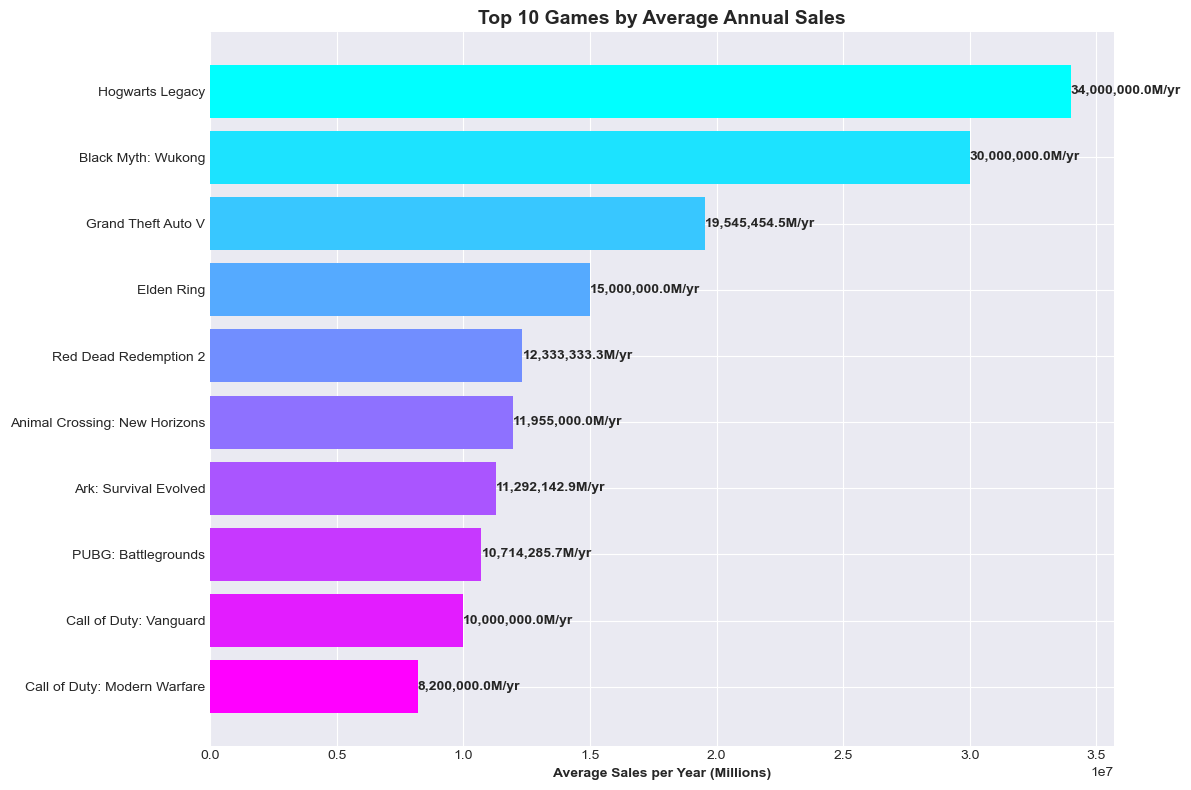

In [24]:
plt.figure(figsize=(12, 8))
top_10_annual = df.nlargest(10, 'Sales per Year')
plt.barh(range(len(top_10_annual)), top_10_annual['Sales per Year'], 
         color=plt.cm.cool(np.linspace(0, 1, 10)))
plt.yticks(range(len(top_10_annual)), top_10_annual['Game Title'])
plt.xlabel('Average Sales per Year (Millions)', fontweight='bold')
plt.title('Top 10 Games by Average Annual Sales', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, (idx, row) in enumerate(top_10_annual.iterrows()):
    plt.text(row['Sales per Year'] + 0.5, i, f"{row['Sales per Year']:,.1f}M/yr", 
             va='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
total_sales = df['Units Sold (millions)'].sum()

series_market_share = (df.groupby('Series')['Units Sold (millions)'].sum() / total_sales * 100).sort_values(ascending=False)
print("Market Share by Game Series (Top 10):")
print("=" * 70)
for series, share in series_market_share.head(10).items():
    print(f"{series:30s} | {share:>6.2f}%")


platform_market_share = (df.groupby('Platform(s)')['Units Sold (millions)'].sum() / total_sales * 100).sort_values(ascending=False)
print("\n\nMarket Share by Platform:")
print("=" * 70)
for platform, share in platform_market_share.head(10).items():
    print(f"{platform:30s} | {share:>6.2f}%")


Market Share by Game Series (Top 10):
Minecraft                      |  13.20%
Call of Duty                   |  10.01%
Grand Theft Auto               |   8.11%
Wii                            |   7.09%
Super Mario                    |   5.60%
Mario Kart                     |   4.30%
Pokémon                        |   4.01%
The Sims                       |   4.00%
Ark                            |   2.98%
PUBG Universe                  |   2.83%


Market Share by Platform:
Multi-platform                 |  75.67%
Wii                            |   9.64%
Nintendo Switch                |   4.28%
Wii U / Switch                 |   4.19%
PC                             |   1.53%
Game Boy                       |   1.32%
Nintendo DS                    |   1.16%
Game Boy Color                 |   1.14%
Famicom / NES                  |   1.07%


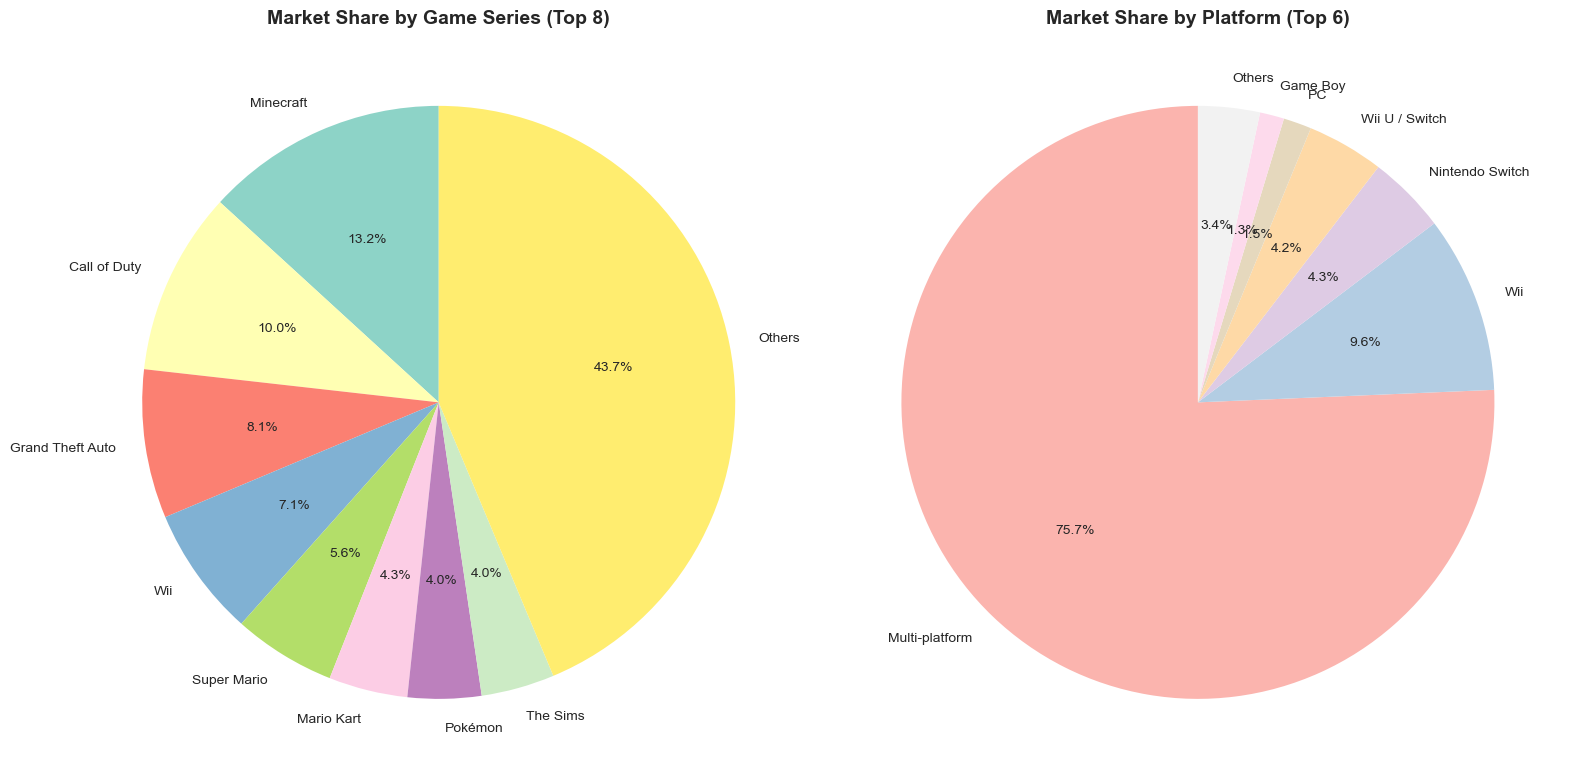

In [26]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


top_series_share = series_market_share.head(8)
other_share = series_market_share.iloc[8:].sum()
pie_data = list(top_series_share.values) + [other_share]
pie_labels = list(top_series_share.index) + ['Others']
colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Market Share by Game Series (Top 8)', fontsize=14, fontweight='bold')


top_platform_share = platform_market_share.head(6)
other_platform_share = platform_market_share.iloc[6:].sum()
pie_data2 = list(top_platform_share.values) + [other_platform_share]
pie_labels2 = list(top_platform_share.index) + ['Others']
colors2 = plt.cm.Pastel1(np.linspace(0, 1, len(pie_data2)))
ax2.pie(pie_data2, labels=pie_labels2, autopct='%1.1f%%', startangle=90, colors=colors2)
ax2.set_title('Market Share by Platform (Top 6)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()